In [1]:
import numpy as np
import pandas as pd

In [2]:
s = pd.Series([3, 1, 16, -4, 97])
s

0     3
1     1
2    16
3    -4
4    97
dtype: int64

In [3]:
letters = pd.Series(np.random.choice(list('abcdefghijklmnopqrstuvwxyz'), 100))
numbers = pd.Series(np.random.choice(np.arange(1, 101), 100))

In [4]:
numbers.astype('float')

0      78.0
1      39.0
2      86.0
3      62.0
4      56.0
      ...  
95     77.0
96     25.0
97    100.0
98     47.0
99     20.0
Length: 100, dtype: float64

In [5]:
letters.astype('int')

ValueError: invalid literal for int() with base 10: 'h'

In [ ]:
['a', 'b', 'c'] == 'a'

In [ ]:
letters

In [ ]:
letters[letters == 'a']

In [ ]:
mask = numbers > 50
numbers[mask]

In [ ]:
numbers[numbers > 50]

In [ ]:
greater_than_50_filter = numbers > 50
is_even_filter = numbers % 2 == 0
is_divisible_by_5 = numbers % 5 == 0

In [ ]:
numbers[greater_than_50_filter & is_even_filter & is_divisible_by_5]

In [ ]:
vowels = list('aeiou')
vowels

In [ ]:
'a' in vowels

In [ ]:
letters[letters.isin(vowels)]

In [ ]:
letters.isin(vowels).sum()

In [ ]:
letters[letters.isin(vowels)].sum()

In [ ]:
letters[letters.isin(vowels)].shape

In [ ]:
(letters == 'b').any()

In [ ]:
(numbers > 0).all()

In [ ]:
type(letters[letters.isin(vowels)])

In [ ]:
letters[letters.isin(vowels)].value_counts().sort_values().tail(1)

In [ ]:
[numbers.count(), numbers.mean(), numbers.std()]

In [ ]:
numbers.agg(['count', 'mean', 'std'])

In [ ]:
numbers_summary = numbers.describe()
numbers_summary

In [ ]:
numbers_summary['75%'] - numbers_summary['25%']

In [6]:
x

NameError: name 'x' is not defined

In [7]:
def is_divisible_by_4(n):
    if n % 4 == 0:
        return 'Evenly Divisible By Four!'
    else:
        return 'Not Evenly Divisible By Four :('

    
numbers.apply(is_divisible_by_4)

0     Not Evenly Divisible By Four :(
1     Not Evenly Divisible By Four :(
2     Not Evenly Divisible By Four :(
3     Not Evenly Divisible By Four :(
4           Evenly Divisible By Four!
                   ...               
95    Not Evenly Divisible By Four :(
96    Not Evenly Divisible By Four :(
97          Evenly Divisible By Four!
98    Not Evenly Divisible By Four :(
99          Evenly Divisible By Four!
Length: 100, dtype: object

In [13]:
def bin_number(n):
    if n < 25:
        return '[0, 25)'
    elif n < 50:
        return '[25, 50)'
    elif n < 75:
        return '[50, 75)'
    else:
        return '[75, 101)'
    
numbers.apply(bin_number).value_counts().sort_index()

[0, 25)      23
[25, 50)     26
[50, 75)     26
[75, 101)    25
dtype: int64

In [16]:
numbers.value_counts(bins=4).sort_index()

(0.9, 25.75]      24
(25.75, 50.5]     27
(50.5, 75.25]     25
(75.25, 100.0]    24
dtype: int64

In [26]:
pd.cut(numbers, 4).value_counts().sort_index(ascending=False)

(75.25, 100.0]    24
(50.5, 75.25]     25
(25.75, 50.5]     27
(0.901, 25.75]    24
dtype: int64

In [19]:
pd.cut(numbers, 4).value_counts().sort_index()

(0.901, 25.75]    24
(25.75, 50.5]     27
(50.5, 75.25]     25
(75.25, 100.0]    24
dtype: int64

In [28]:
pd.cut(numbers, 4, labels=['very small', 'small', 'large', 'very large']).value_counts().sort_index()

very small    24
small         27
large         25
very large    24
dtype: int64

## Binning Data

- `pd.cut` for ~ equal sized bins (but maybe not the same number of values in each bin)
- `pd.qcut` for ~ the same number of values in each bin (but the bins might have different widths)

In [32]:
pd.cut(numbers, 8)

0     (75.25, 87.625]
1      (38.125, 50.5]
2     (75.25, 87.625]
3      (50.5, 62.875]
4      (50.5, 62.875]
           ...       
95    (75.25, 87.625]
96    (13.375, 25.75]
97    (87.625, 100.0]
98     (38.125, 50.5]
99    (13.375, 25.75]
Length: 100, dtype: category
Categories (8, interval[float64]): [(0.901, 13.375] < (13.375, 25.75] < (25.75, 38.125] < (38.125, 50.5] < (50.5, 62.875] < (62.875, 75.25] < (75.25, 87.625] < (87.625, 100.0]]

In [31]:
pd.qcut(numbers, 8).value_counts().sort_index()

(0.999, 10.0]      14
(10.0, 26.75]      11
(26.75, 41.0]      15
(41.0, 50.0]       11
(50.0, 64.875]     11
(64.875, 72.75]    13
(72.75, 87.25]     12
(87.25, 100.0]     13
dtype: int64

In [35]:
def lowercase_string(s):
    return s.lower()

numbers.apply(is_divisible_by_4).apply(lowercase_string)

0     not evenly divisible by four :(
1     not evenly divisible by four :(
2     not evenly divisible by four :(
3     not evenly divisible by four :(
4           evenly divisible by four!
                   ...               
95    not evenly divisible by four :(
96    not evenly divisible by four :(
97          evenly divisible by four!
98    not evenly divisible by four :(
99          evenly divisible by four!
Length: 100, dtype: object

In [37]:
numbers.apply(is_divisible_by_4).str.lower()

0     not evenly divisible by four :(
1     not evenly divisible by four :(
2     not evenly divisible by four :(
3     not evenly divisible by four :(
4           evenly divisible by four!
                   ...               
95    not evenly divisible by four :(
96    not evenly divisible by four :(
97          evenly divisible by four!
98    not evenly divisible by four :(
99          evenly divisible by four!
Length: 100, dtype: object

In [38]:
numbers.apply(is_divisible_by_4).str[:4]

0     Not 
1     Not 
2     Not 
3     Not 
4     Even
      ... 
95    Not 
96    Not 
97    Even
98    Not 
99    Even
Length: 100, dtype: object

In [39]:
numbers.apply(is_divisible_by_4)[:4]

0    Not Evenly Divisible By Four :(
1    Not Evenly Divisible By Four :(
2    Not Evenly Divisible By Four :(
3    Not Evenly Divisible By Four :(
dtype: object

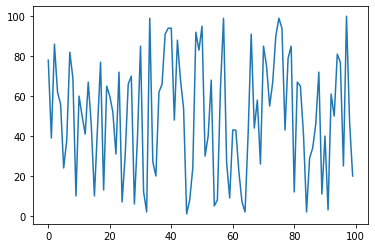

In [42]:
%matplotlib inline

numbers.plot()

Text(0.5, 1.0, 'Distribution of Numbers')

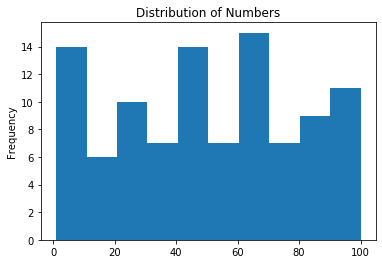

In [45]:
import matplotlib.pyplot as plt

numbers.plot.hist()
plt.title('Distribution of Numbers')

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

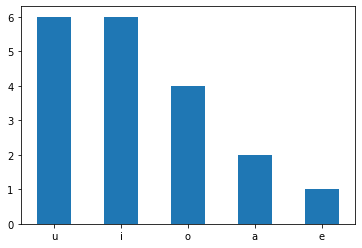

In [51]:
vowels = list('aeiou')

letters[letters.isin(vowels)].value_counts().plot.bar()
plt.xticks(rotation=0)

In [52]:
s = pd.Series([1, 2, 3])
s

0    1
1    2
2    3
dtype: int64

In [53]:
s[0] = 16

In [54]:
s

0    16
1     2
2     3
dtype: int64

In [57]:
pd.Series(['a', 'b', np.nan])

0      a
1      b
2    NaN
dtype: object

In [61]:
pd.Series([1, 2, 3, np.nan, 4, 5, 6]).fillna(0)

0    1.0
1    2.0
2    3.0
3    0.0
4    4.0
5    5.0
6    6.0
dtype: float64